In [2]:
import pandas as pd
import gc
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from feat_eng import *
import pickle
import xgboost as xgb

In [2]:

train = pd.read_parquet('kaggle_data/Zzzs_train_multi.parquet')

In [3]:
train = make_features(train)

y_train = train.pop('awake')
X_train = train.drop(columns=["series_id"])

del train
gc.collect()

0

In [4]:
X_train.dtypes

step                     float64
anglez                   float32
enmo                     float32
hour                     float64
minute                   float64
anglezdiff               float32
rolling_algo_awake         int32
enmo_median_60           float32
enmo_mean_60             float32
enmo_max_60              float32
enmo_min_60              float32
enmo_var_60              float32
enmo_median_360          float32
enmo_mean_360            float32
enmo_max_360             float32
enmo_min_360             float32
enmo_var_360             float32
enmo_median_720          float32
enmo_mean_720            float32
enmo_max_720             float32
enmo_min_720             float32
enmo_var_720             float32
anglez_median_60         float32
anglez_mean_60           float32
anglez_max_60            float32
anglez_min_60            float32
anglez_var_60            float32
anglez_median_360        float32
anglez_mean_360          float32
anglez_max_360           float32
anglez_min

In [5]:
# Random Forest with hyperparameters from Optuna
# From https://www.kaggle.com/code/michalinahulak/feature-engineering-and-rf-optuna/notebook#XGBoost-2.0

# rf_classifier = RandomForestClassifier(n_estimators=100,
#                                     min_samples_leaf=122,
#                                     max_depth = 19,
#                                     random_state=42,
#                                     n_jobs=-1)

In [6]:
# xgboost
classifier = xgb.XGBClassifier(n_estimators=50,

                               min_child_weight=300,
                               random_state=42,
                               n_jobs=-1,
)
classifier.fit(X_train, y_train)

del X_train, y_train
gc.collect()

37

In [7]:
file_name = "xgb_test.pkl"

# save
pickle.dump(classifier, open(file_name, "wb"))


In [5]:

file_name = "pretrained_models/xgb_test.pkl"
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

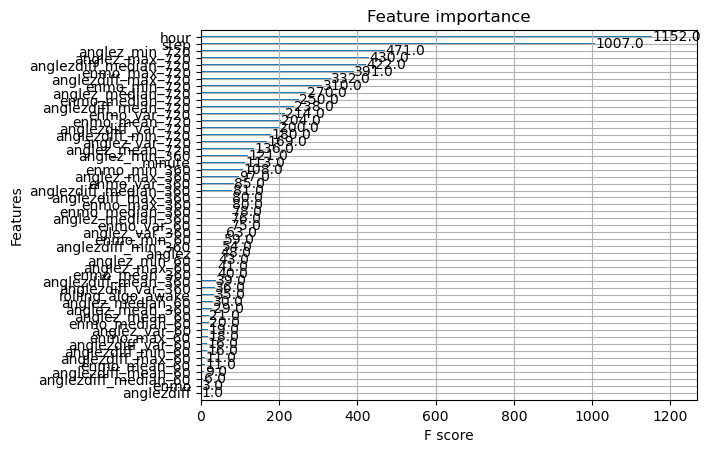

In [7]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(xgb_model_loaded)
plt.show()